In [ ]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid"); 
plt.rcParams['figure.dpi'] = 360
from wordcloud import WordCloud 
import spacy  
from spacy.lang.en import English  
nlp = English()  
from collections import Counter 
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*
!pip install nltk
import zipfile
import shutil
from glob import glob
import os
from sklearn.model_selection import train_test_split
import sys
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import time
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup as soup
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
!pip install num2words
import num2words
from nltk import ne_chunk
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

In [ ]:
#mount google drive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/personality_prediction/mbti_1.csv')
df.head(3)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...


In [7]:
#class labels with number of samples for each class
df.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


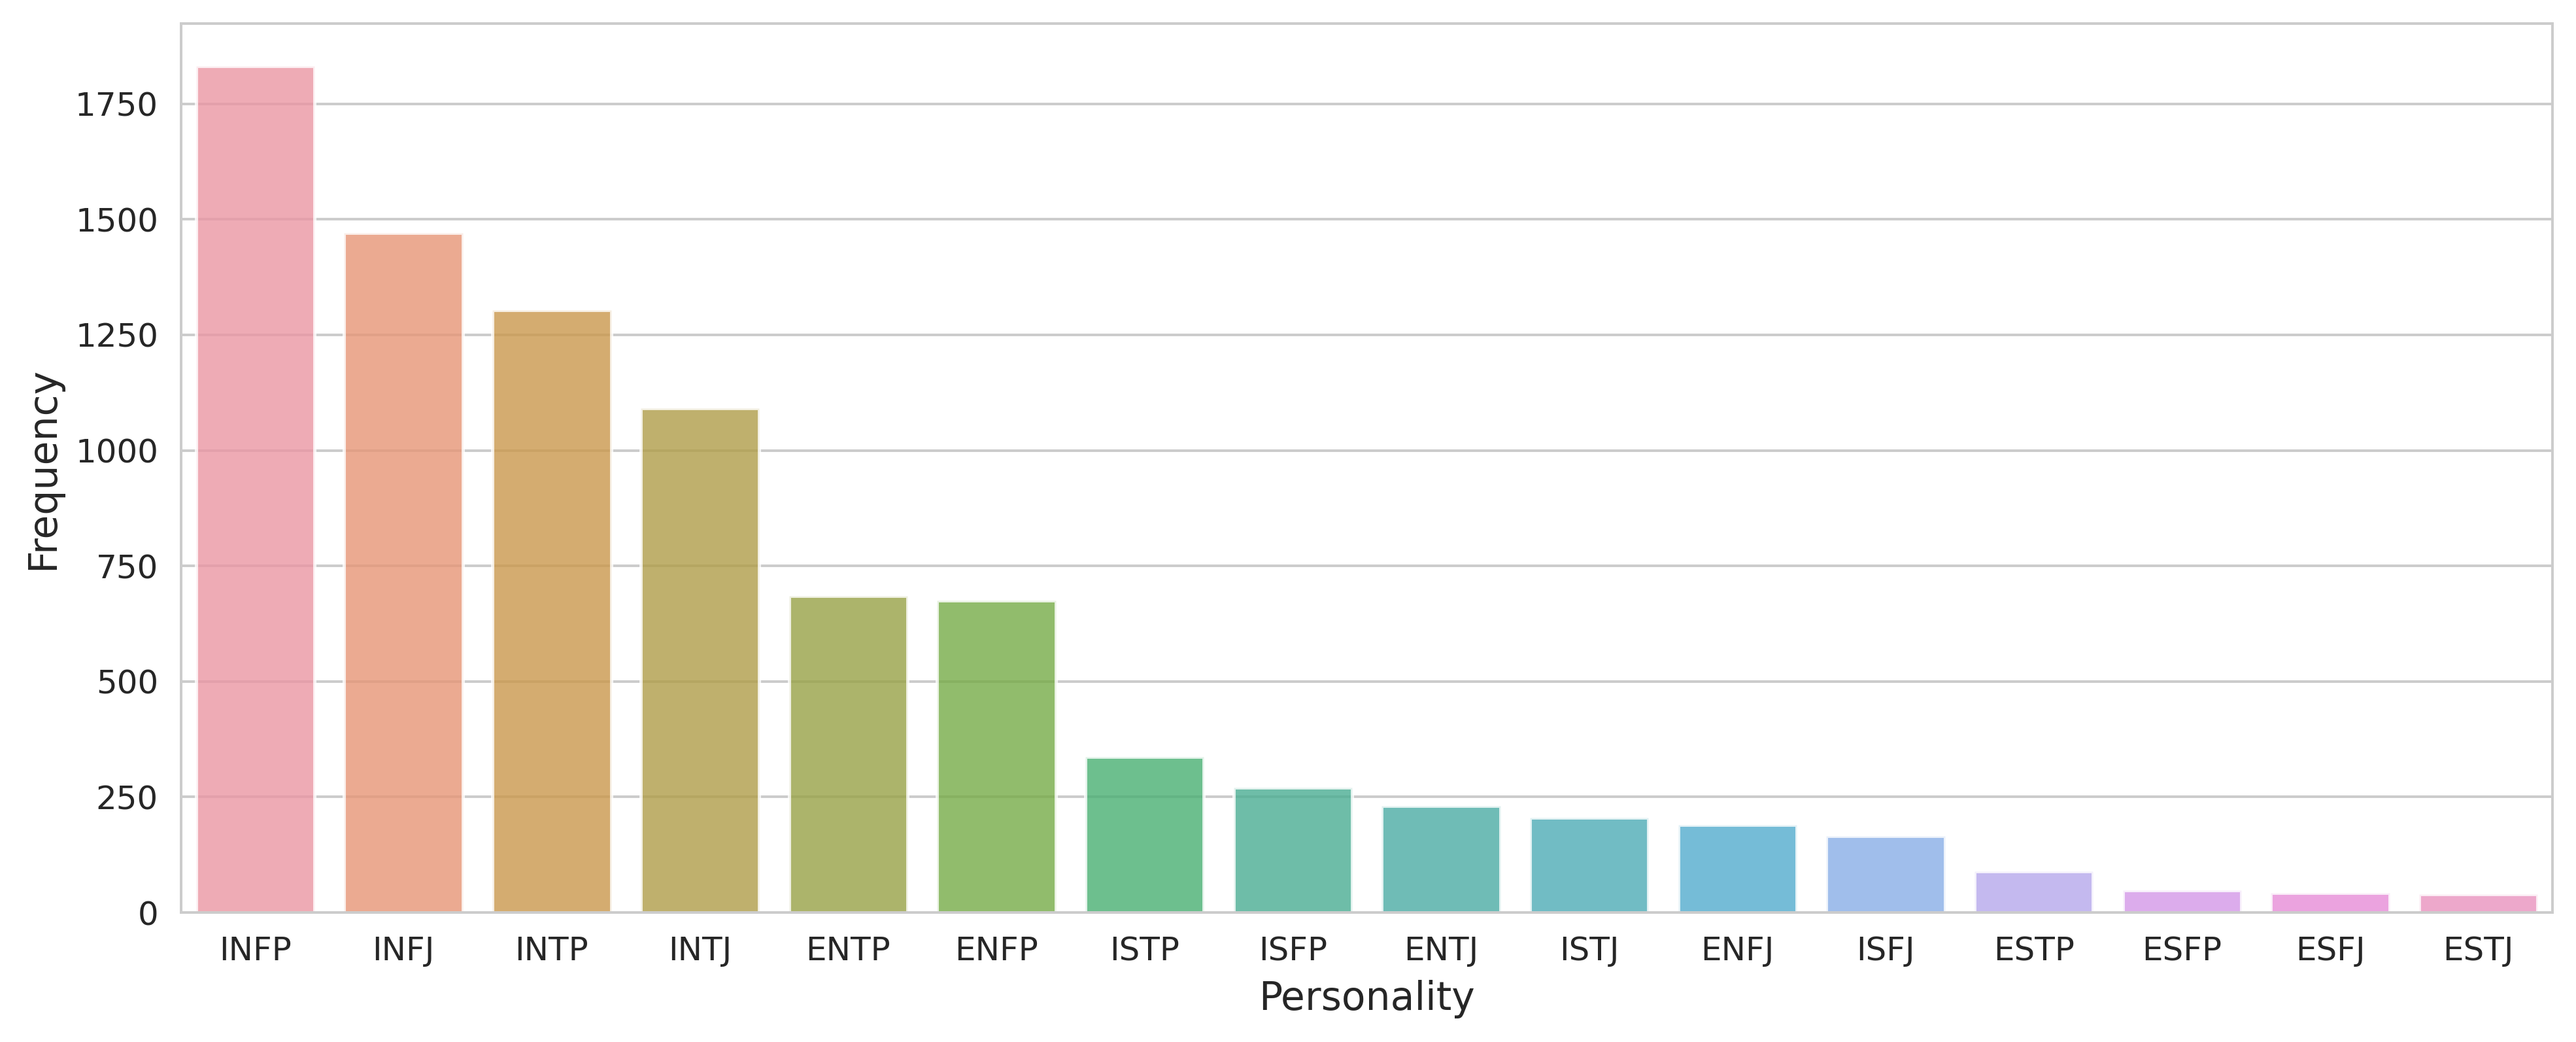

In [10]:
view_type = df['type'].value_counts()

plt.figure(figsize=(13,5))
sns.barplot(view_type.index, view_type.values, alpha=0.8)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Personality', fontsize=12)
plt.show()

In [12]:
#create binary label along 4 axis
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

df = df.join(df.apply (lambda row: get_types (row),axis=1))
df.head(3)

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0


In [14]:
#check the distrubution of data along different labels
print ("Introversion (I) /  Extroversion (E):\t", df['IE'].value_counts()[0], " / ", df['IE'].value_counts()[1])
print ("Intuition (N) – Sensing (S):\t\t", df['NS'].value_counts()[0], " / ", df['NS'].value_counts()[1])
print ("Thinking (T) – Feeling (F):\t\t", df['TF'].value_counts()[0], " / ", df['TF'].value_counts()[1])
print ("Judging (J) – Perceiving (P):\t\t", df['JP'].value_counts()[0], " / ", df['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) – Sensing (S):		 1197  /  7478
Thinking (T) – Feeling (F):		 4694  /  3981
Judging (J) – Perceiving (P):		 5241  /  3434


In [15]:
#one hot encoding of binary labels
Letter = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
Pairs = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    
    return [Letter[l] for l in personality]

def translate_back(personality):
    # transform binary vector to mbti personality
    
    s = ""
    for i, l in enumerate(personality):
        s += Pairs[i][l]
    return s

# Check ...
M = df.head(4)
list_personality_bin = np.array([translate_personality(p) for p in M.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 [0 0 1 0]]


In [16]:
df['posts'] = [soup(text).get_text() for text in df['posts']]

In [ ]:
df['posts']

0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1       'I'm finding the lack of me in these posts ver...
2       'Good one  _____   https://www.youtube.com/wat...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired.|||That's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
8671    'So...if this thread already exists someplace ...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: posts, Length: 8675, dtype: object

In [25]:
#remove the label associated words from texts to remove possible biasness
types = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
  
types = [x.lower() for x in types]

In [23]:
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

cachedStopWords = stopwords.words("english")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [21]:
#function to clean the dataset
def pre_process_data(df, remove_stop_words=True, remove_mbti_profiles=True):

    list_personality = []
    list_posts = []
    len_data = len(df)
    i=0
    
        
    for row in df.iterrows():
        i+=1
        if (i % 500 == 0 or i == 1 or i == len_data):
            print("%s of %s rows" % (i, len_data))

        ##### Remove and clean comments
        cachedStopWords = stopwords.words("english")
        posts = row[1].posts
        temp = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',"",posts)
        # temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
            
        if remove_mbti_profiles:
            for t in types:
                temp = temp.replace(t,"")

        type_labelized = translate_personality(row[1].type)
        list_personality.append(type_labelized)
        list_posts.append(temp)

    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

In [19]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [26]:
list_posts, list_personality = pre_process_data(df, remove_stop_words=True)

1 of 8675 rows
500 of 8675 rows
1000 of 8675 rows
1500 of 8675 rows
2000 of 8675 rows
2500 of 8675 rows
3000 of 8675 rows
3500 of 8675 rows
4000 of 8675 rows
4500 of 8675 rows
5000 of 8675 rows
5500 of 8675 rows
6000 of 8675 rows
6500 of 8675 rows
7000 of 8675 rows
7500 of 8675 rows
8000 of 8675 rows
8500 of 8675 rows
8675 of 8675 rows


In [27]:
list_posts[0]

'   moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello  sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo  lady complimentary personality well h

In [ ]:
list_personality

array([[0, 0, 0, 0],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       ...,
       [0, 0, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
type(list_posts)

numpy.ndarray

In [30]:

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfTransformer

In [31]:
CV = CountVectorizer(analyzer="word", 
                             max_features=1500, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,  
                             max_df=0.7,
                             min_df=0.1) 

In [32]:
print("CountVectorizer...")
X_CV = CV.fit_transform(list_posts)
print(CV.vocabulary_)

CountVectorizer...
{'moment': 445, 'top': 707, 'play': 522, 'experience': 222, 'today': 702, 'may': 422, 'perc': 507, 'last': 370, 'posted': 532, 'next': 465, 'day': 152, 'rest': 575, 'hello': 308, 'sorry': 633, 'hear': 304, 'natural': 457, 'relationship': 568, 'every': 211, 'try': 719, 'figure': 248, 'hard': 300, 'welcome': 753, 'stuff': 663, 'game': 270, 'set': 600, 'least': 382, 'minute': 441, 'mean': 425, 'maybe': 423, 'basically': 58, 'come': 113, 'three': 698, 'likely': 390, 'use': 732, 'given': 277, 'cognitive': 109, 'function': 267, 'left': 384, 'video': 739, 'note': 472, 'somewhat': 629, 'completely': 120, 'death': 156, 'dear': 155, 'favorite': 239, 'current': 143, 'cool': 132, 'late': 371, 'sad': 581, 'everyone': 212, 'wait': 742, 'within': 762, 'world': 771, 'enjoy': 203, 'worry': 772, 'around': 40, 'personality': 512, 'hey': 312, 'main': 414, 'social': 625, 'live': 398, 'conversation': 131, 'quickly': 549, 'part': 500, 'thread': 697, 'high': 314, 'eat': 190, 'many': 419, 'w

In [33]:
TF = TfidfTransformer()
print("Tf-idf...")
X_TF =  TF.fit_transform(X_CV).toarray()

Tf-idf...


In [34]:
words = list(enumerate(CV.get_feature_names()))
# words

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
X_TF.shape

(8675, 790)

In [36]:
print("X: Posts in tf-idf representation \n* 1st row:\n%s" % X_TF[0])

X: Posts in tf-idf representation 
* 1st row:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08097165 0.06868296 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.10392112 0.         0.05006481 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08695508 0.
 0.         0.10550655 0.         0.         0.         0.
 0.         0.05220184 0.06864987 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.       

In [37]:
type_pairs = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) – Sensing (S)", 
                   "FT: Feeling (F) - Thinking (T)", "JP: Judging (J) – Perceiving (P)"  ]

for l in range(len(type_pairs)):
    print(type_pairs[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) – Sensing (S)
FT: Feeling (F) - Thinking (T)
JP: Judging (J) – Perceiving (P)


In [38]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
X = X_TF

In [40]:
list_personality

array([[0, 0, 0, 0],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       ...,
       [0, 0, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [75]:
for l in range(len(type_pairs)):
    print("%s ..." % (type_pairs[l]))
    
    # Let's train type indicator individually
    Y = list_personality[:,l]

    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X, Y)


    # split data into train and test sets
    seed = 42
    test_size = 0.30
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=test_size, random_state=seed, stratify = y_res)

    # fit model on training data
    

    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_pairs[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 84.65%
NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) Accuracy: 88.08%
FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) Accuracy: 75.33%
JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) Accuracy: 71.83%


In [ ]:
!pip install shap

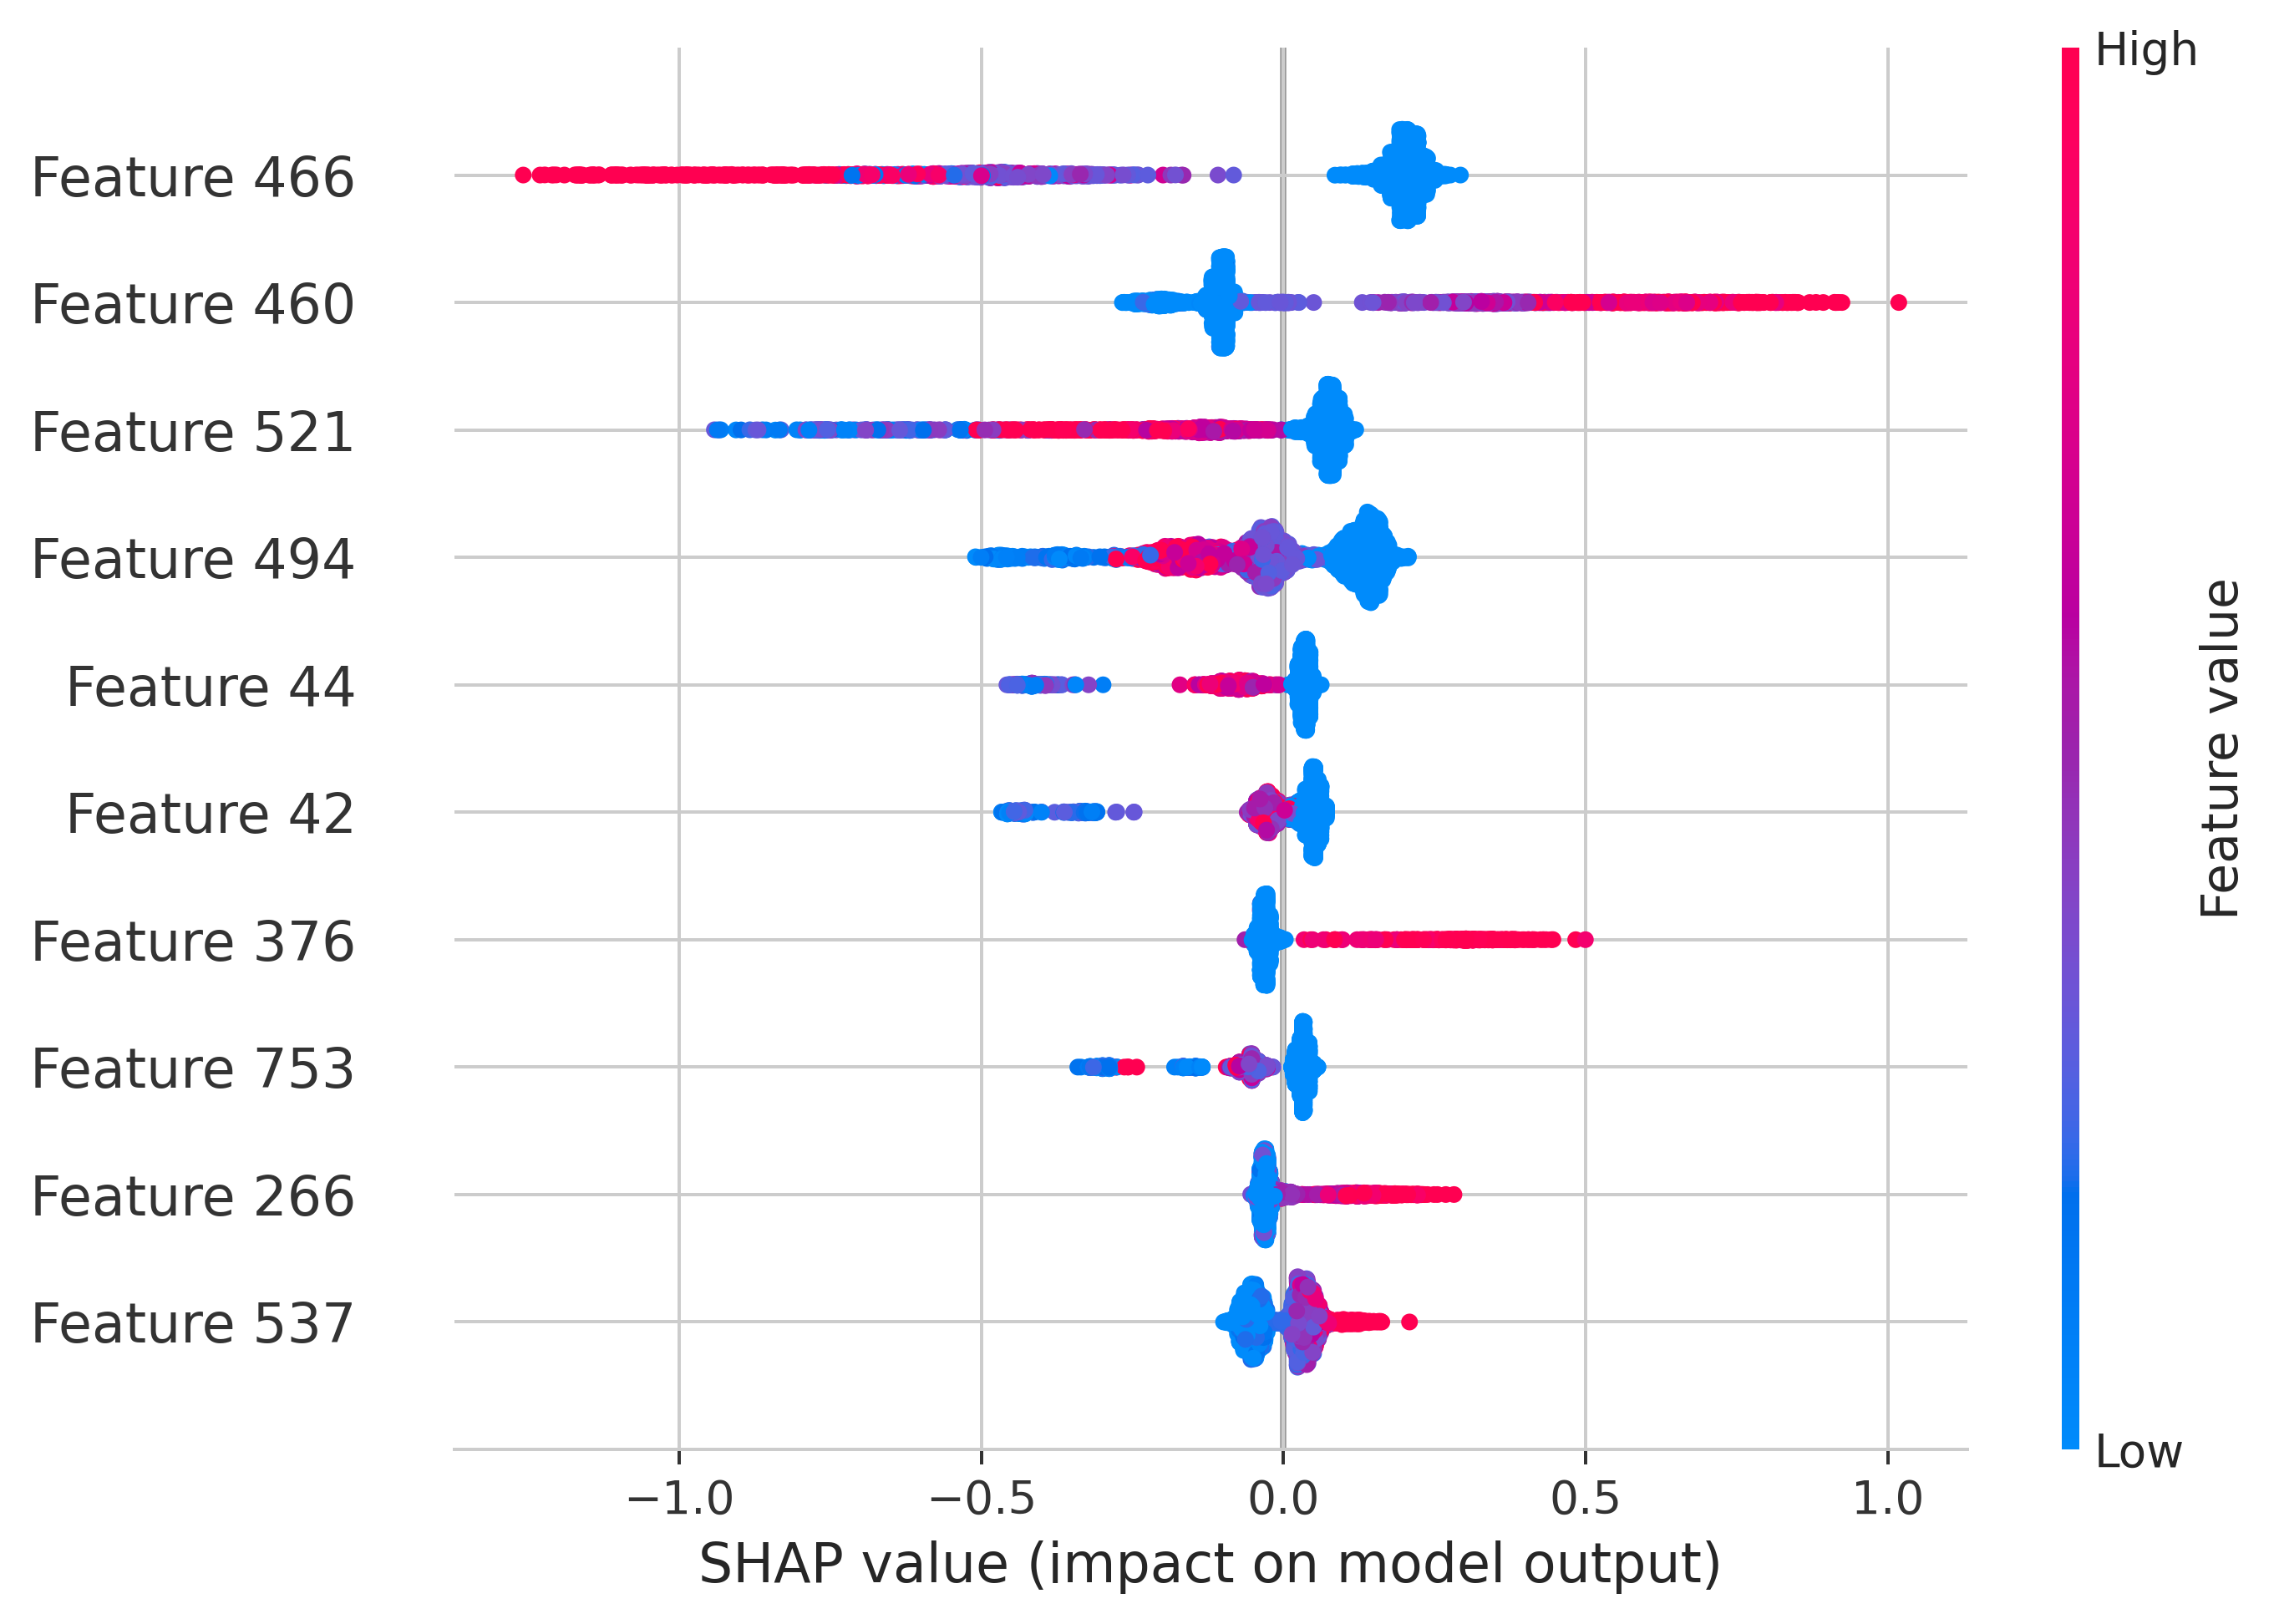

In [76]:
import shap
plt.figure(figsize = (6,6))
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,max_display=10)
plt.show()